In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [2]:
#read all diff sst_spatialmean_ann HadISST Observations

# read files

GPCP = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/data/GPCP/GPCP.cvdp_data.1979-2019.nc', decode_times=False) 

ppt = GPCP['pr_spatialmean_ann']
ppt_djf = GPCP['pr_spatialmean_djf']
ppt_jja = GPCP['pr_spatialmean_jja']
ppt_mam = GPCP['pr_spatialmean_mam']
ppt_son = GPCP['pr_spatialmean_son']
lat = GPCP['lat']
lon= GPCP['lon']

print ('files read')

files read


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


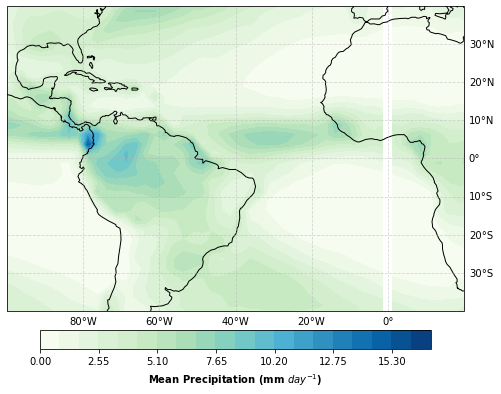

In [5]:
#plotting ann mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes) 

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, ppt, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/GPCP_png/ann')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


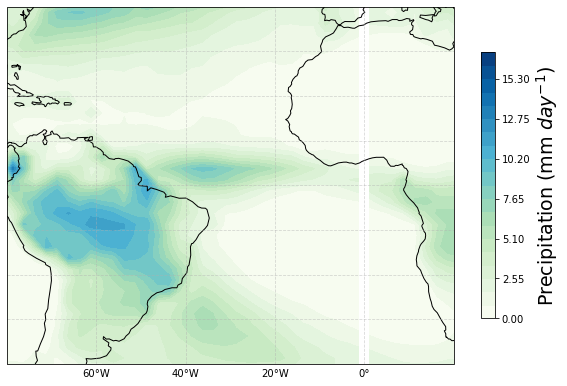

In [9]:
#plotting djf 

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
#ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',rotation='horizontal', rotation_mode='anchor', fontweight='bold',transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylabels_left=False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, ppt_djf, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.7)
cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
cb.set_label(label='Precipitation (mm $day^{-1}$)', size=19)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/GPCP_png/ppt_djf', bbox_inches='tight',pad_inches = 0.02)

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


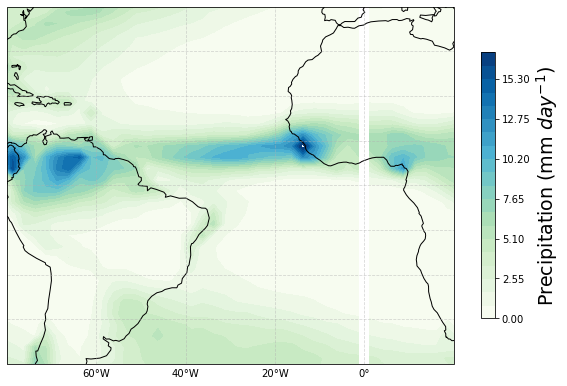

In [4]:
#plotting jja 

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
#ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',rotation='horizontal', rotation_mode='anchor', fontweight='bold',transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.ylabels_right= False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, ppt_jja, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.7)
cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
cb.set_label(label='Precipitation (mm $day^{-1}$)', size=19)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/GPCP_png/ppt_jja', bbox_inches='tight',pad_inches = 0.02)

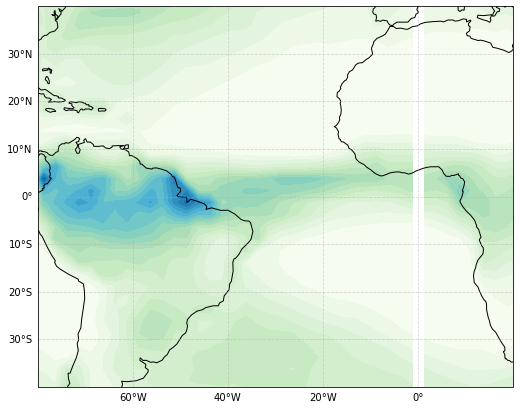

In [7]:
#plotting mam 

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)


ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, ppt_mam, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

#cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.7)
#cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
#cb.set_label(label='Precipitation (mm $day^{-1}$)', size=19)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/GPCP_png/ppt_mam', bbox_inches='tight',pad_inches = 0.02)

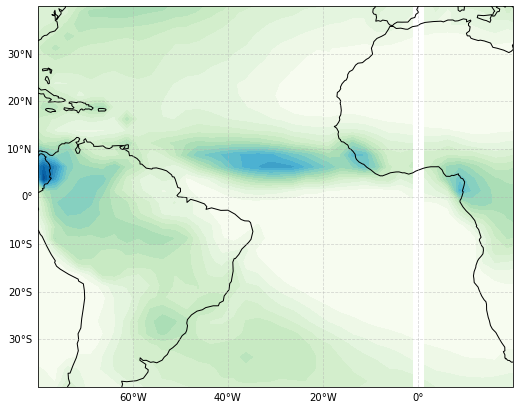

In [8]:
#plotting son 

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)


ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, ppt_son, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

#cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
#plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/GPCP_png/ppt_son', bbox_inches='tight',pad_inches = 0.02)

In [12]:
#read all PMIP4 Historical ppt spatial means

# read files

HistoricalAnn = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann/PMIP4_historical_pr_spatialmean_ann.nc', decode_times=False) 
ppt = HistoricalAnn['pr_spatialmean_ann']
pptmean = ppt.mean(dim='gcms', skipna=True, keep_attrs=True)

HistoricalDJF = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/PMIP4_historical_pr_spatialmean_djf.nc', decode_times=False) 
ppt_djf = HistoricalDJF['pr_spatialmean_djf']
djfmean = ppt_djf.mean(dim='gcms', skipna=True, keep_attrs=True)

HistoricalJJA = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/PMIP4_historical_pr_spatialmean_jja.nc', decode_times=False) 
ppt_jja = HistoricalJJA['pr_spatialmean_jja']
jjamean = ppt_jja.mean(dim='gcms', skipna=True, keep_attrs=True)

lat = HistoricalAnn['lat']
lon= HistoricalAnn['lon']

print ('files read')

files read


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


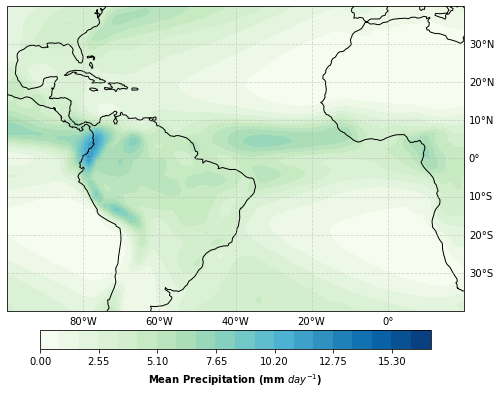

In [13]:
#plotting ann mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,pptmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/ann')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


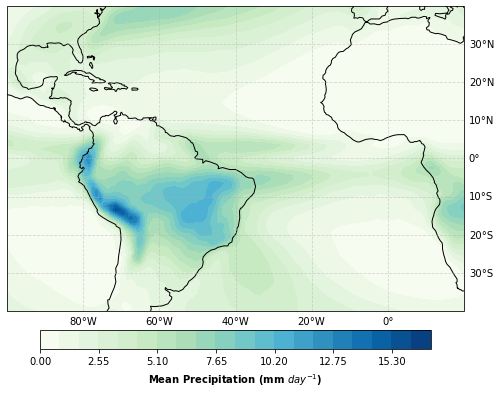

In [14]:
#plotting djf mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,djfmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/djf')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


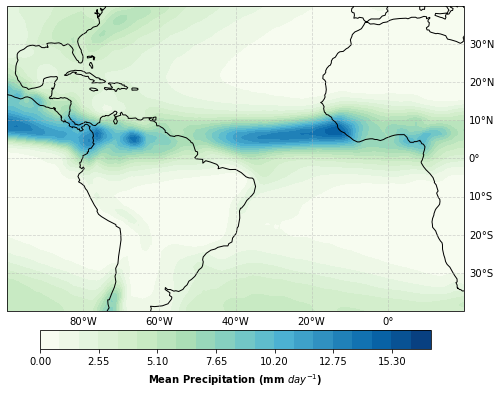

In [17]:
#plotting jja mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,jjamean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/jja')

In [4]:
#read all PMIP3 Historical ppt spatial means

# read files

HistoricalAnn = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann/PMIP3_historical_pr_spatialmean_ann.nc', decode_times=False) 
ppt = HistoricalAnn['pr_spatialmean_ann']
pptmean = ppt.mean(dim='gcms', skipna=True, keep_attrs=True)

HistoricalDJF = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/PMIP3_historical_pr_spatialmean_djf.nc', decode_times=False) 
ppt_djf = HistoricalDJF['pr_spatialmean_djf']
djfmean = ppt_djf.mean(dim='gcms', skipna=True, keep_attrs=True)

HistoricalJJA = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/PMIP3_historical_pr_spatialmean_jja.nc', decode_times=False) 
ppt_jja = HistoricalJJA['pr_spatialmean_jja']
jjamean = ppt_jja.mean(dim='gcms', skipna=True, keep_attrs=True)

lat = HistoricalAnn['lat']
lon= HistoricalAnn['lon']

print ('files read')

files read


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


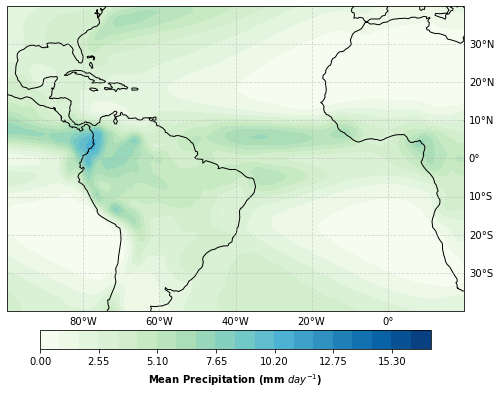

In [5]:
#plotting ann mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,pptmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/PMIP3ann')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


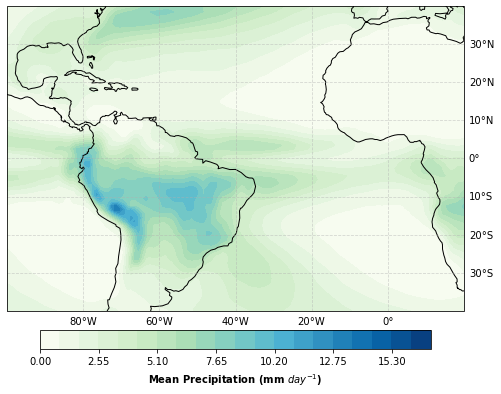

In [6]:
#plotting djf mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,djfmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/PMIP3djf')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


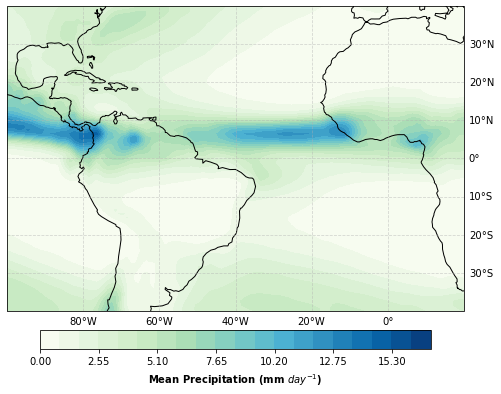

In [7]:
#plotting jja mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,jjamean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/HistoricalPPT_png/PMIP3jja')

In [18]:
#read all piControl ppt spatial means

# read files

piControlAnn = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_ann/PMIP4_piControl_pr_spatialmean_ann.nc', decode_times=False) 
ppt = piControlAnn['pr_spatialmean_ann']
mean = ppt.mean(dim='gcms', skipna=True, keep_attrs=True)

piControlDJF = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/PMIP4_piControl_pr_spatialmean_djf.nc', decode_times=False) 
ppt_djf = piControlDJF['pr_spatialmean_djf']
djfmean = ppt_djf.mean(dim='gcms', skipna=True, keep_attrs=True)

piControlJJA = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/PMIP4_piControl_pr_spatialmean_jja.nc', decode_times=False) 
ppt_jja = piControlJJA['pr_spatialmean_jja']
jjamean = ppt_jja.mean(dim='gcms', skipna=True, keep_attrs=True)

lat = piControlAnn['lat']
lon= piControlAnn['lon']

print ('files read')

files read


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


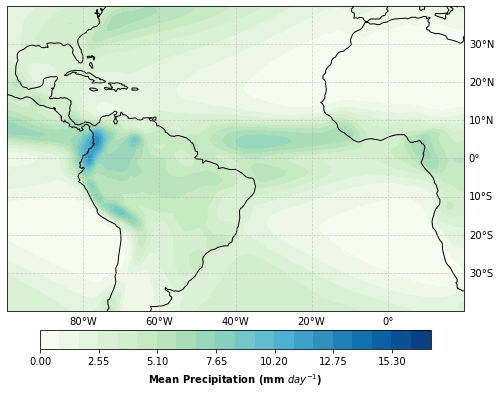

In [19]:
#plotting ann mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, mean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/piControlPPT_png/ann')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


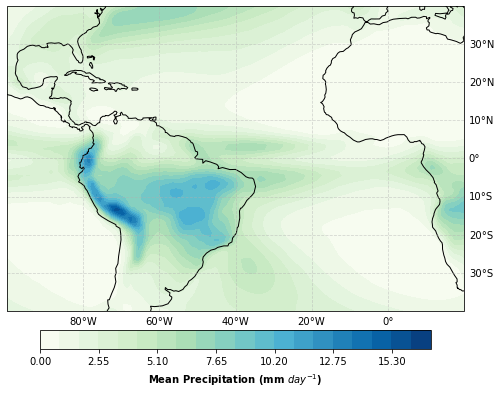

In [20]:
#plotting djf mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,djfmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/piControlPPT_png/djf')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


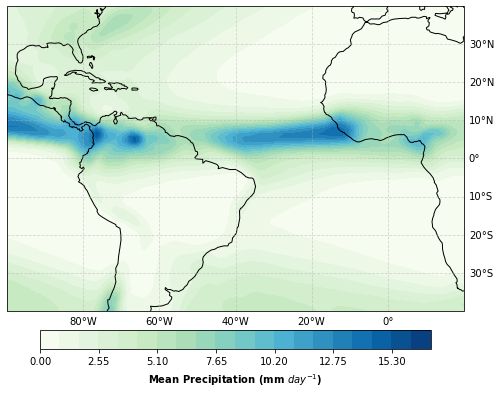

In [21]:
#plotting ann mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,jjamean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/piControlPPT_png/jja')

In [10]:
#read all piControl ppt spatial means

# read files



piControlDJF = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_djf/PMIP3_piControl_pr_spatialmean_djf.nc', decode_times=False) 
ppt_djf = piControlDJF['pr_spatialmean_djf']
djfmean = ppt_djf.mean(dim='gcms', skipna=True, keep_attrs=True)

piControlJJA = xr.open_dataset('/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/pr_jja/PMIP3_piControl_pr_spatialmean_jja.nc', decode_times=False) 
ppt_jja = piControlJJA['pr_spatialmean_jja']
jjamean = ppt_jja.mean(dim='gcms', skipna=True, keep_attrs=True)

lat = piControlDJF['lat']
lon= piControlDJF['lon']

print ('files read')

files read


/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


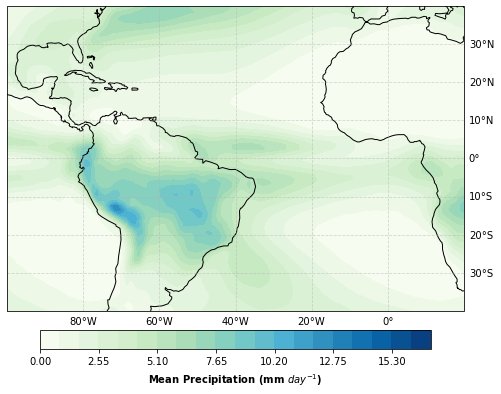

In [11]:
#plotting djf mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat,djfmean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/piControlPPT_png/PMIP3djf')

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.


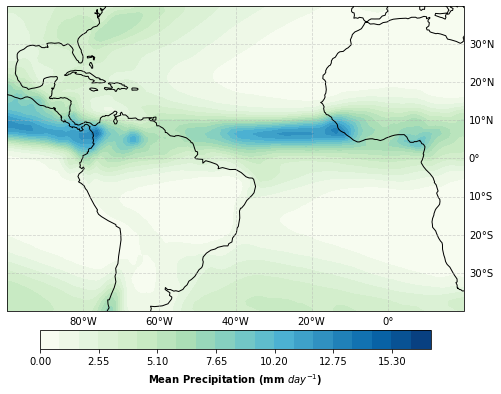

In [13]:
#plotting jja mean

#temperatures

cmap= plt.get_cmap('GnBu') #define colour map

#define colormap's range and scale

clim=[0,17]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

#regional map 

region=[-100, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform= ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax= plt.axes(projection=projection)
ax.text(0.5, -0.25, 'Mean Precipitation (mm $day^{-1}$)', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor', fontweight='bold',
        transform=ax.transAxes)

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False

#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

fig=ax.contourf(lon, lat, jjamean, levels=bounds, transform=transform, cmap=cmap, norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax, kw = matplotlib.colorbar.make_axes(ax,location='bottom', pad=0.05, shrink=0.7)
plt.colorbar(fig,cax=cax, extend='both', **kw)
plt.savefig('/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/piControlPPT_png/PMIP3jja')